In [4]:
import pandas as pd
import numpy as np
import plotly
import plotly.express as px
import seaborn as sns

import matplotlib.pyplot as plt 

In [5]:
df = pd.read_excel('https://query.data.world/s/v5zns7nfsxrye4zbyljtuqoparvo4h')

In [6]:
df.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [7]:
tr = df.corr()

In [8]:
bdd = df[['Age', 'Gender','Alcohol use','Genetic Risk', 'Dust Allergy',
       'Chest Pain', 'Coughing of Blood',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity','Dry Cough', 'Snoring', 'Smoking','Level']]
bdd.head()

,Age,Gender,Alcohol use,Genetic Risk,Dust Allergy,Chest Pain,Coughing of Blood,chronic Lung Disease,Balanced Diet,Obesity,Dry Cough,Snoring,Smoking,Level
0,33,1,4,3,5,2,4,2,2,4,3,4,3,Low
1,17,1,1,4,5,2,3,2,2,2,7,2,2,Medium
2,35,1,5,5,6,4,8,4,6,7,7,2,2,High
3,37,1,7,6,7,7,8,7,7,7,7,5,7,High
4,46,1,8,7,7,7,9,6,7,7,2,3,8,High


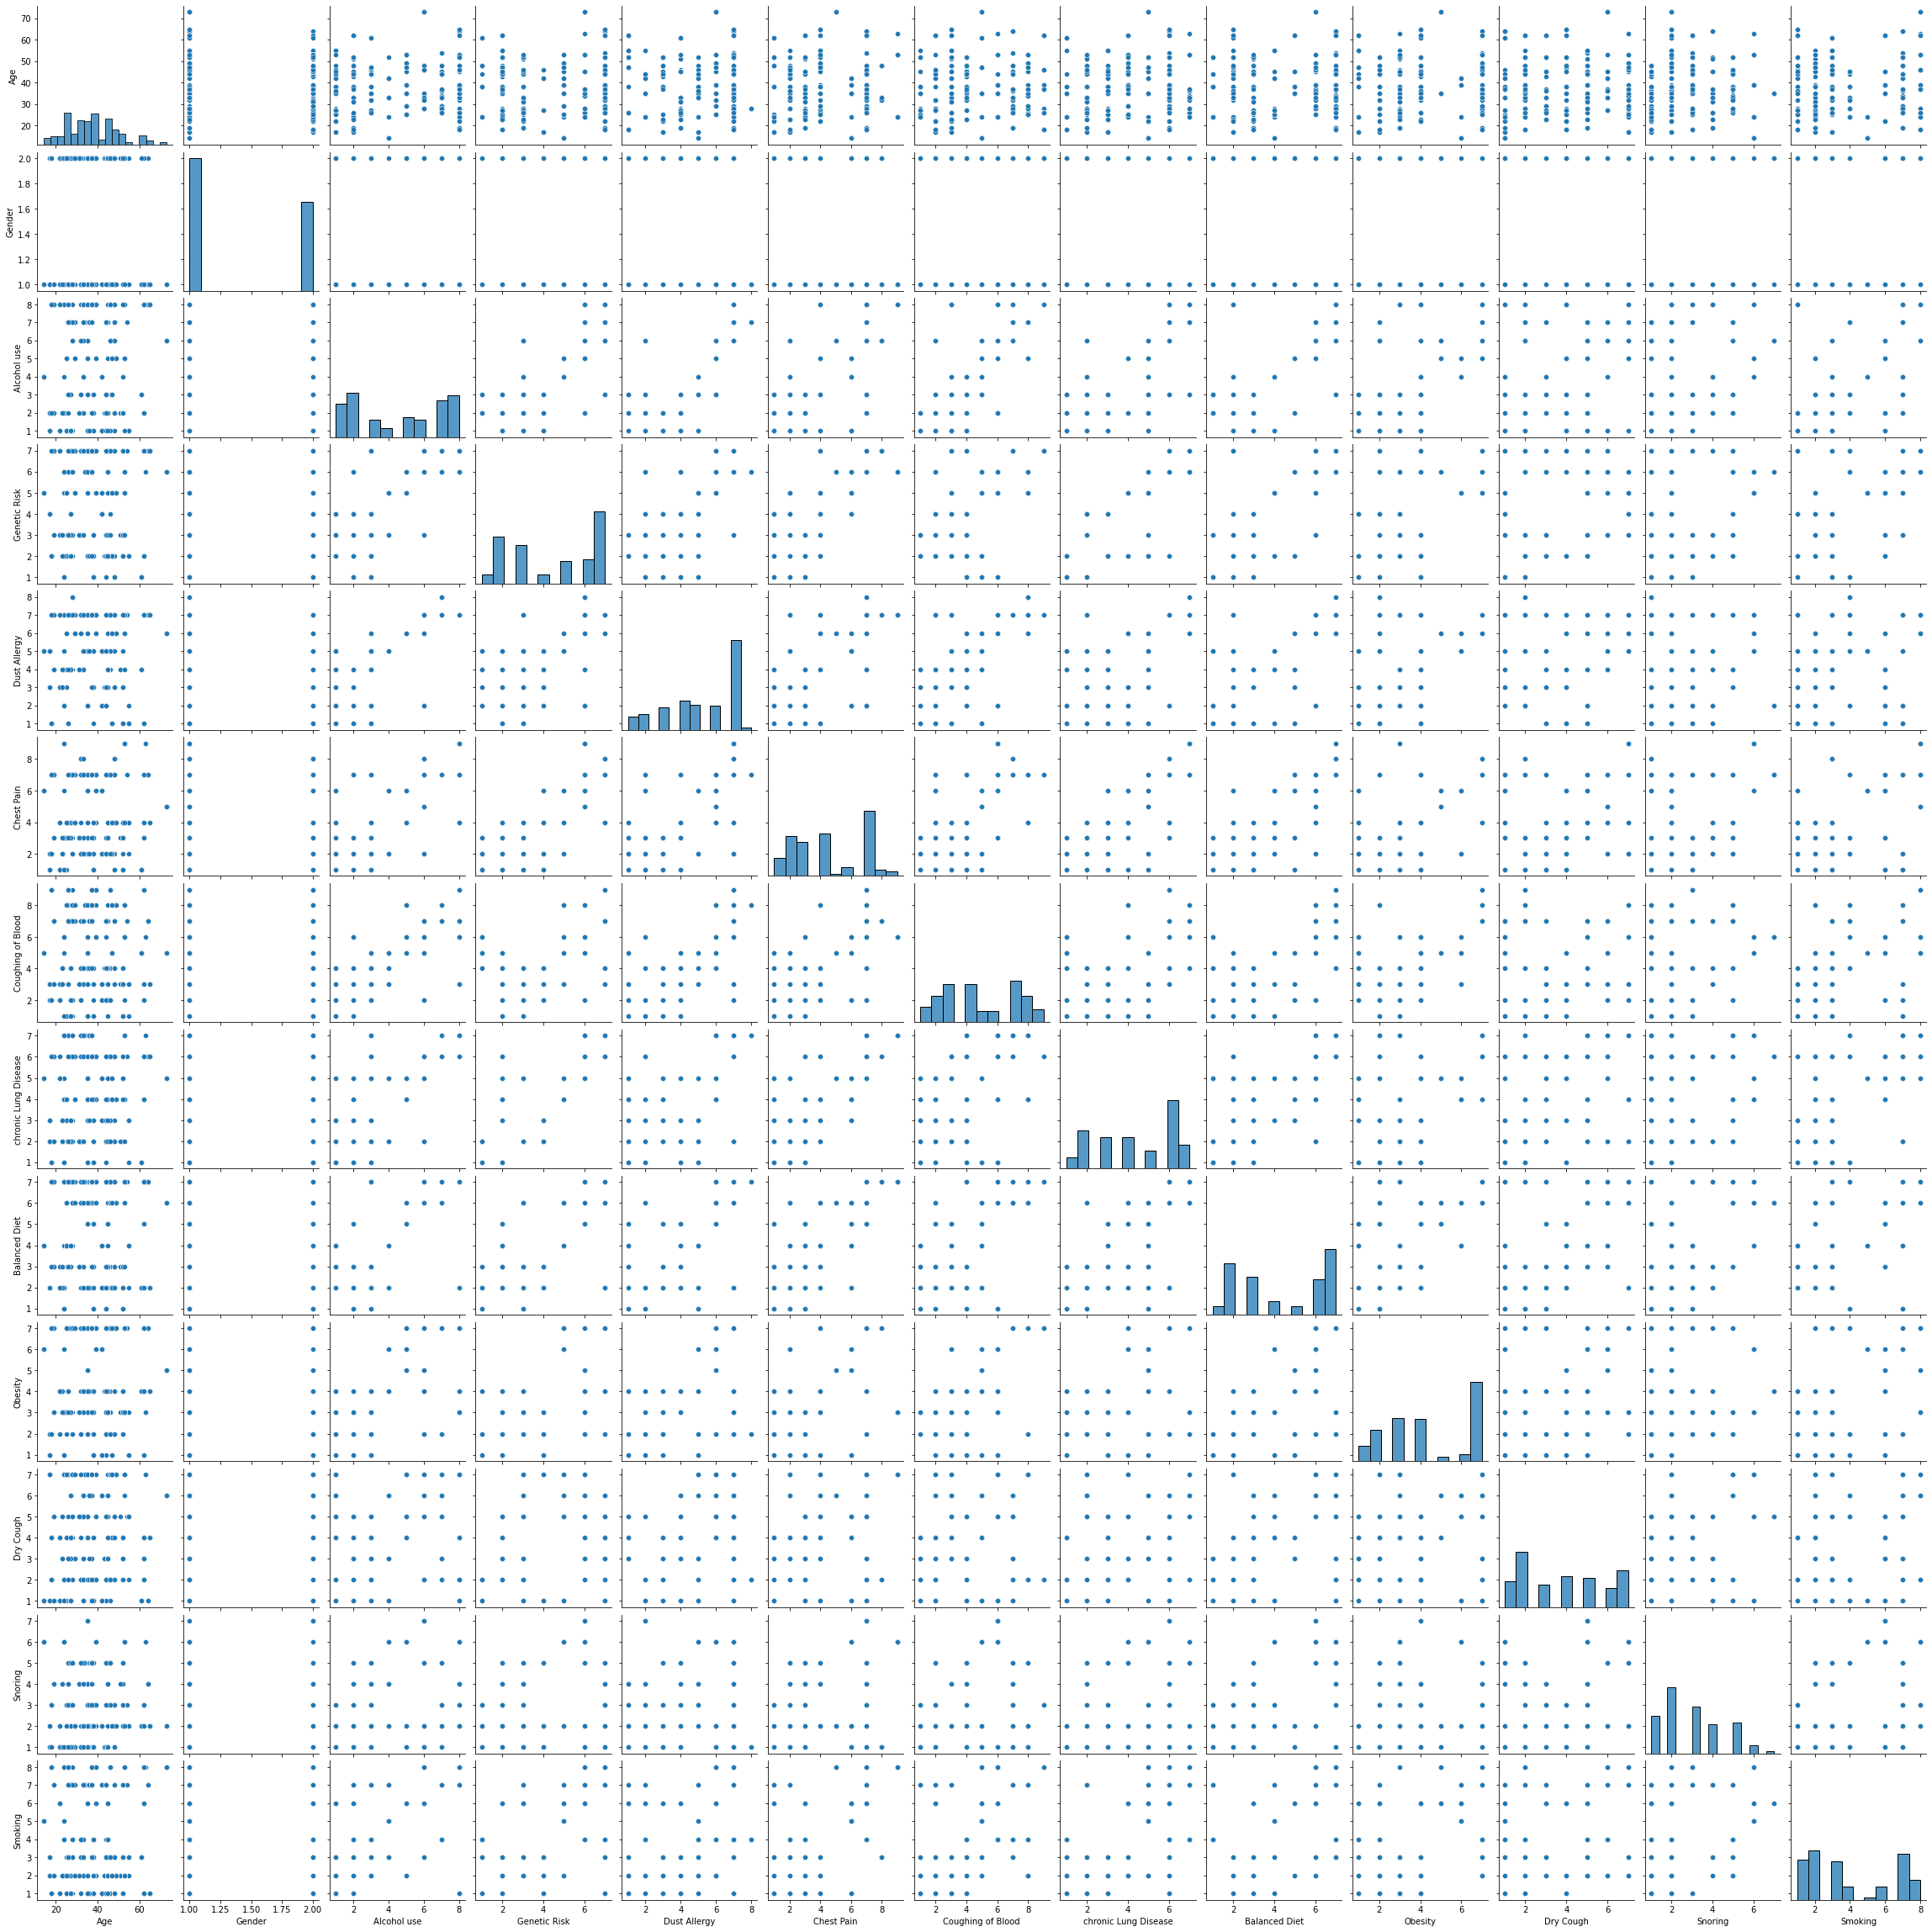

In [9]:
sns.pairplot(bdd)

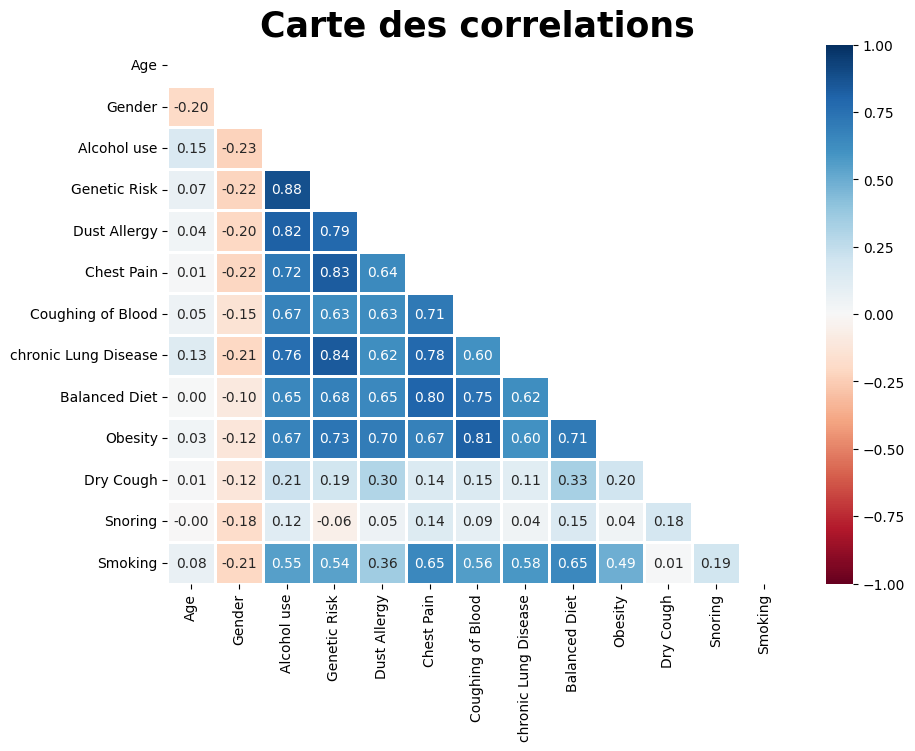

In [10]:
def correlation(data, figsize):
    mask = np.triu(np.ones_like(data.corr(), dtype = bool)) # pour masquer la 2ème partie du tableau
    plt.figure(figsize=figsize)
    sns.heatmap(data.corr(), mask=mask, center= 0, cmap= 'RdBu', linewidths=1, annot=True, fmt= ".2f", vmin=-1, vmax=1)
    plt.title('Carte des correlations', fontsize =25, fontweight= "bold")
    
    return plt.show()
correlation(bdd, figsize=(10,7))

'Alcohol use','Genetic Risk', 'Dust Allergy',
       'Chest Pain', 'Coughing of Blood',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity','Dry Cough', 'Snoring', 'Smoking'

In [14]:

g= px.ecdf(bdd, x='Alcohol use', color="Gender", markers=True, lines=True, marginal="histogram")
g.add_pie()

In [ ]:
px.histogram(bdd,x='Level', y = "Genetic Risk", color='Gender', pattern_shape='Smoking', title=" Variation du niveau risque génetique en fontion du sexe chez les fumeurs ")

NameError: name 'px' is not defined

In [ ]:
features = ['Age', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', ]

fig = px.scatter_matrix(df, dimensions= features, color= df['Level'])
fig.update_traces()
fig.show()

In [ ]:
df.columns

Index(['Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [ ]:
px.histogram(df['Age'], color= df['Gender'], title=" Distribution d'age suivant le genre ")

<AxesSubplot:xlabel='Age', ylabel='Alcohol use'>

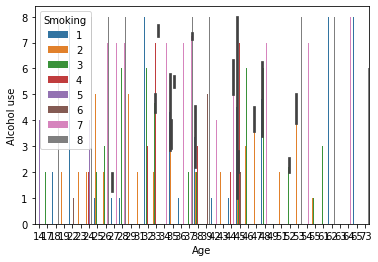

In [ ]:
sns.barplot(data=df, x="Age", y="Alcohol use", hue='Smoking')

In [ ]:
px.pie(data_frame=df, values='Alcohol use', names='Level', )
